<a href="https://colab.research.google.com/github/nadiroumaima/machine_learning_labs/blob/main/Linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import time

Linear equation is defined as below:

$$
Y = \beta_{0} + \beta_{1}X
$$

In [2]:
def linear(X, b0, b1):
    return [b0+b1*x for x in X]

\begin{align}
\beta_{0} = \bar y - \beta_{1}\bar x
\end{align}
<center>Intercept</center>
<br>

In [3]:
def intercept(X, Y, b1):
    x_ = np.mean(X)
    y_ = np.mean(Y)

    return y_-b1*x_

\\begin{align}
\beta_{1} = \frac{\sum_{i=1}^n(x_{i} - \bar x)(y_{i} - \bar y)}{\sum_{i=1}^n(x_{i} - \bar x)^2}
\end{align}
<center>Co-efficient (Slope)</center>


To simplify the slope equation above:


\begin{align}
\beta_{1} = \frac{\sum rise}{\sum run}
\end{align}

In [4]:
def slope(X, Y):
    x_ = np.mean(X)
    y_ = np.mean(Y)

    rise = sum([(x-x_) * (y-y_) for x,y in zip(X,Y)])
    run = sum([(x-x_)**2 for x,y in zip(X,Y)])

    return rise / run

In [5]:
data = pd.read_csv("/content/sample_data/Automobile_data.csv")
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
try:
    data[['price']] = data[['price']].astype(int)
except ValueError:
    print("Trying out the line of code above will result to this error:\n")


Trying out the line of code above will result to this error:

Value Error: invalid literal for int() with base 10: '?'


In [17]:
data['price'].value_counts()[:5]


8921     2
18150    2
8845     2
8495     2
7609     2
Name: price, dtype: int64

In [18]:
data = data.loc[data['price']!='?']
data[['price']] = data[['price']].astype(int)

<ipython-input-19-495cb02ea585>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


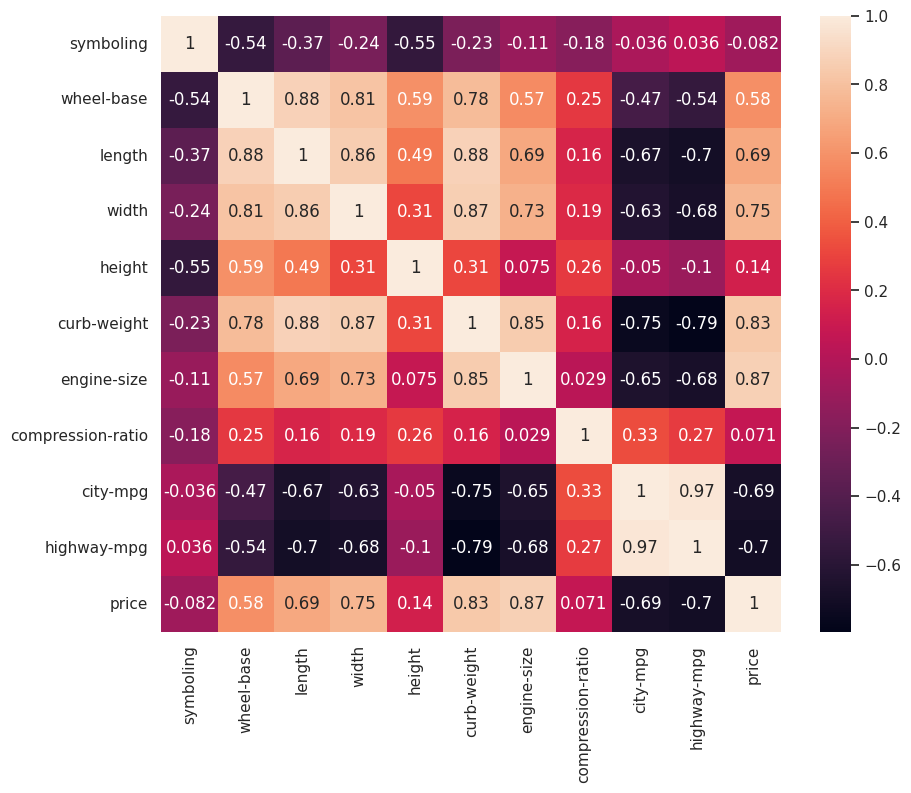

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

engine-size has the highest  (0.87) with price let us use that column.

In [20]:
final_data = data[['engine-size', 'price']]
predictor = data['engine-size']
target = data['price']

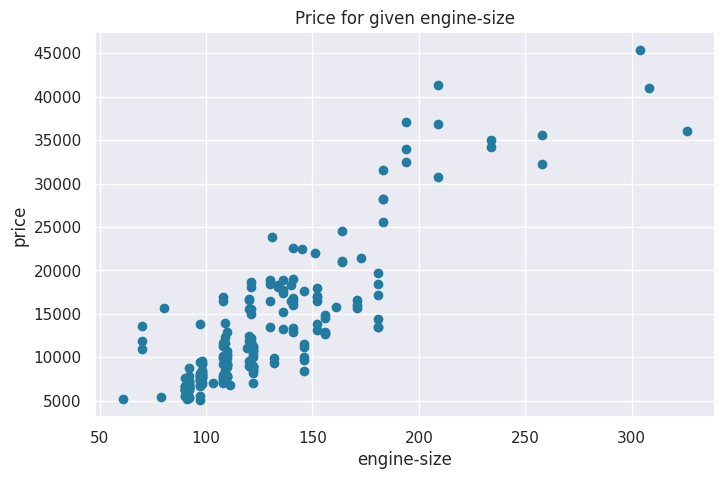

In [21]:
plt.figure(figsize=(8,5))
plt.title("Price for given engine-size")
plt.scatter(predictor, target, color = "#247ba0")
plt.xlabel('engine-size')
plt.ylabel('price')
plt.show()

Prediction

In [23]:
b1 = slope(predictor, target)
b0 = intercept(predictor, target, b1)
predicted = linear(predictor, b0, b1)
print(predicted)

[13728.463133603032, 13728.463133603032, 17399.38347881419, 10224.402804083293, 14729.62322775153, 14729.62322775153, 14729.62322775153, 14729.62322775153, 13895.323149294447, 10057.542788391875, 10057.542788391875, 19401.703667111182, 19401.703667111182, 19401.703667111182, 26910.404373224912, 26910.404373224912, 26910.404373224912, 2215.122050895314, 7054.062505946384, 7054.062505946384, 7054.062505946384, 7054.062505946384, 8388.942631477714, 7054.062505946384, 7054.062505946384, 7054.062505946384, 8388.942631477714, 12393.583008071702, 18066.823541579855, 7387.782537329216, 7387.782537329216, 5218.602333340807, 7387.782537329216, 7387.782537329216, 7387.782537329216, 7387.782537329216, 10391.262819774707, 10391.262819774707, 10391.262819774707, 10391.262819774707, 10391.262819774707, 10391.262819774707, 10558.122835466125, 11893.002960997455, 35086.5451421043, 35086.5451421043, 46433.02620912061, 7220.9225216378, 7220.9225216378, 7220.9225216378, 7220.9225216378, 7220.9225216378, 3

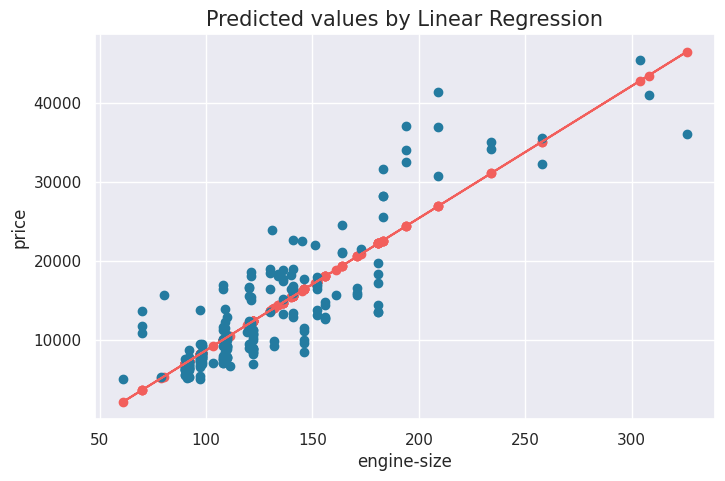

In [24]:
plt.figure(figsize = (8, 5))
plt.plot(predictor, predicted, color = '#f25f5c')
plt.scatter(predictor, predicted, color = '#f25f5c')
plt.title('Predicted values by Linear Regression', fontsize = 15)
plt.xlabel('engine-size')
plt.ylabel('price')
plt.scatter(predictor, target, color = "#247ba0")
plt.show()

In [26]:
print("Coefficients:\n")
print("b0 : ", b0)
print("b1 : ", b1)

Coefficients:

b0 :  -7963.338906281075
b1 :  166.8600156914162


Evaluation

$ R^2 $ is defined as :

\begin{align}
r^2 = \frac{SS_{regression}}{SS_{total}}
\end{align}

\begin{align}
r^2 = 1 - \frac{SS_{error}}{SS_{total}}
\end{align}

Where:
 - $ SS_{regression} $ - "regression sum of squares"; quantifies how far the predicted value is from the mean
 - $ SS_{error} $ - "error sum of squares"; quantifies the variance of the target data points around the regression line
 - $ SS_{total} $ - "total sum of squares"; quantifies the variance of the target data points around the mean

\begin{align}
SS_{regression} = \sum_{i=1}^m(\hat y_i - \bar y)^2
\end{align}

\begin{align}
SS_{error} = \sum_{i=1}^m(y_i - \hat y)^2
\end{align}

\begin{align}
SS_{total} = \sum_{i=1}^m(y_i - \bar y)^2
\end{align}

In [27]:
def r_squared(Y, Y_HAT):
    ssr, sse, r_sqr = [0]*3
    y_ = np.mean(Y)
#     ssr = sum([(y_hat - y_)**2 for y_hat in Y_HAT])
    sse = sum([(y - y_hat)**2 for y,y_hat in zip(Y, Y_HAT)])
    sst = sum([(y - y_)**2 for y in Y])

    r_sqr = 1 - (sse / sst)

    return r_sqr


In [28]:
r_squared(target, predicted)

0.7609686443622008

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
predictor = np.array(predictor).reshape((-1, 1))
reg = reg.fit(predictor, target)

Y_pred = reg.predict(predictor)
r2_score = reg.score(predictor, target)
print(r2_score)

0.7609686443622008


0.76 it s not that bad and it's the same r2 compared to sklearn.linear_model